In [1]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df.shape

(2930, 6)

In [3]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [4]:
df.dropna(inplace=True)
df.shape

(2929, 6)

(<Figure size 1200x1000 with 36 Axes>,
 array([[<Axes: xlabel='Overall Qual', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='Overall Cond', ylabel='Overall Qual'>,
         <Axes: xlabel='Overall Cond', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='Total Bsmt SF', ylabel='Overall Qual'>,
         <Axes: xlabel='Total Bsmt SF', ylabel='Overall Cond'>,
         <Axes: xlabel='Total Bsmt SF', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: xlabel='Central Air', ylabel='Overall Qual'>,
         <Axes: xlabel='Central Air', ylabel='Overall Cond'>,
         <Axes: xlabel='Central Air', ylabel='Total Bsmt SF'>,
         <Axes: xlabel='Central Air', ylabel='Count'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='Gr Liv Area', ylabel='Overall Qual'>,
         <Axes: xlabel='Gr Liv Area', ylabel='Overall Cond'>,
         <Axes: xlabel='Gr Liv Area', ylabel='Total Bsmt SF'>,
 

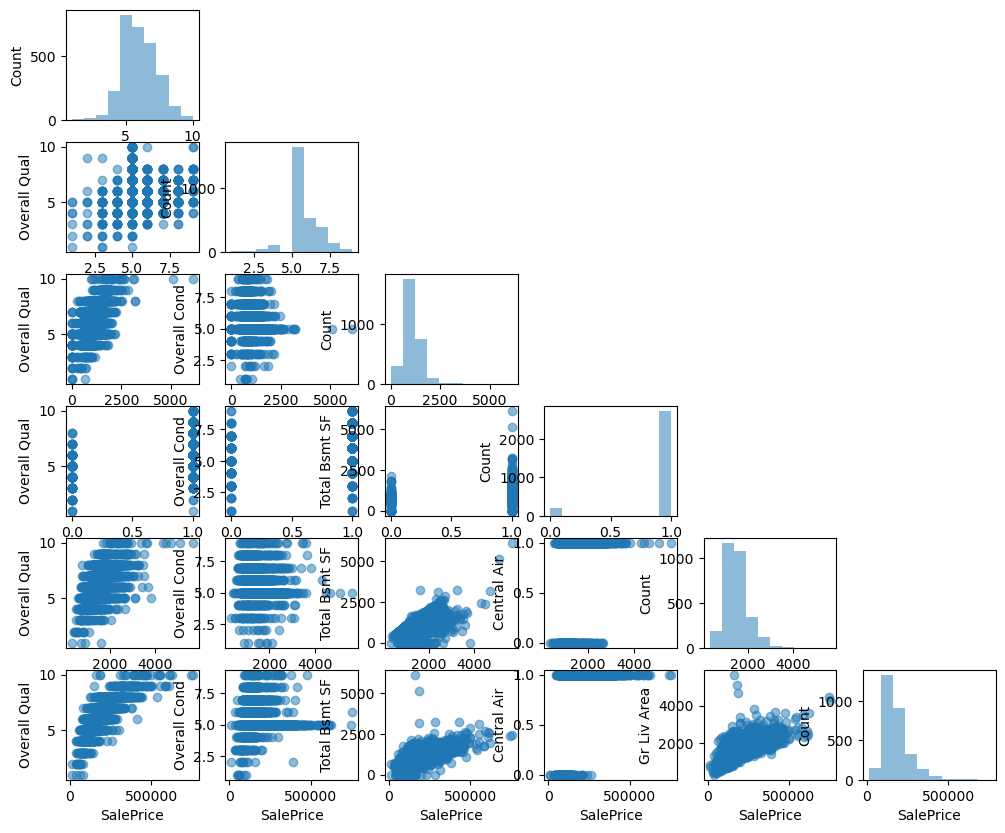

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix, heatmap
scatterplotmatrix(df.values,
                  figsize=(12, 10),
                  names=df.columns,
                  alpha=0.5)


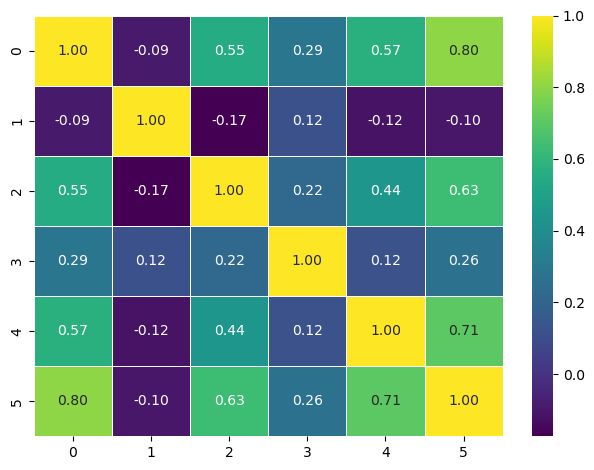

In [6]:
import seaborn as sns
cm = df.corr().values
hm = sns.heatmap(cm, annot=True, cmap='viridis', fmt=".2f", linewidths=.5
             )
plt.tight_layout()

Intercept: 13342.978662355132
Coefficient: [111.66625842]


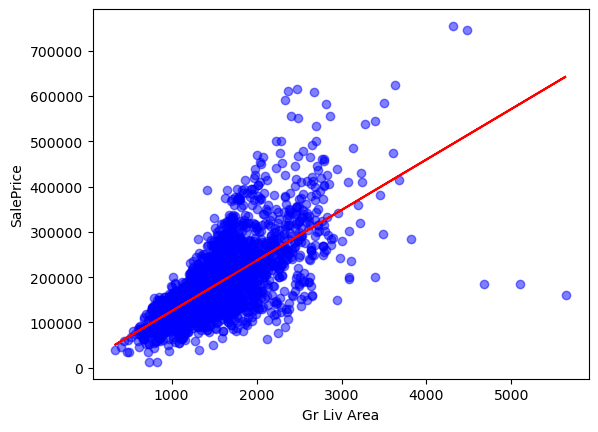

In [7]:
class simple_LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones(X.shape[0]), X]  # add bias term
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        if self.coef_ is None or self.intercept_ is None:
            raise Exception("Model is not fitted yet.")
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term
        return X_b.dot(np.r_[self.intercept_, self.coef_])
OLS_LR = simple_LinearRegression()
OLS_LR.fit(df[['Gr Liv Area']].values, df['SalePrice'].values)
print("Intercept:", OLS_LR.intercept_)
print("Coefficient:", OLS_LR.coef_)
plt.scatter(df[['Gr Liv Area']].values, df['SalePrice'].values, color='blue', alpha=0.5)
plt.plot(df[['Gr Liv Area']].values, OLS_LR.predict(df[['Gr Liv Area']].values), color='red')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()


Intercept (sklearn): 13342.978662355395
Coefficient (sklearn): [111.66625842]


/var/folders/zv/b9smh25s5ssg7711mb72_g500000gn/T/ipykernel_1325/2052167714.py:13: RuntimeWarning: divide by zero encountered in matmul
  return X_b@self.k_b
/var/folders/zv/b9smh25s5ssg7711mb72_g500000gn/T/ipykernel_1325/2052167714.py:13: RuntimeWarning: overflow encountered in matmul
  return X_b@self.k_b
/var/folders/zv/b9smh25s5ssg7711mb72_g500000gn/T/ipykernel_1325/2052167714.py:13: RuntimeWarning: invalid value encountered in matmul
  return X_b@self.k_b


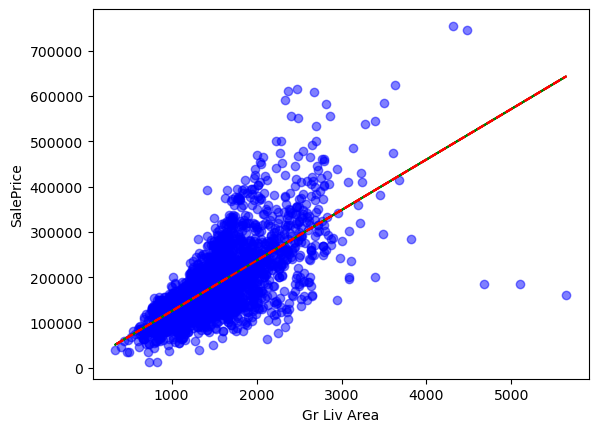

In [16]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(df[['Gr Liv Area']], df['SalePrice'])
print("Intercept (sklearn):", slr.intercept_)
print("Coefficient (sklearn):", slr.coef_)
plt.scatter(df[['Gr Liv Area']].values, df['SalePrice'].values, color='blue', alpha=0.5)
plt.plot(df[['Gr Liv Area']].values, slr.predict(df[['Gr Liv Area']]), color='green')
plt.plot(df[['Gr Liv Area']].values, OLS_LR.predict(df[['Gr Liv Area']].values), color='red', linestyle='dashed')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(


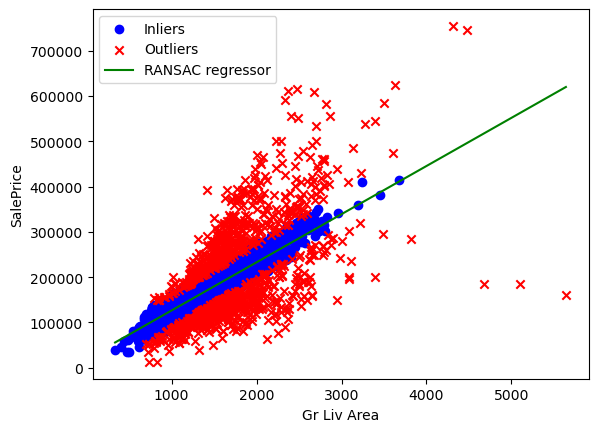

In [23]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), min_samples=0.95, residual_threshold=None, random_state=123)
ransac.fit(df[['Gr Liv Area']], df['SalePrice'])
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(df['Gr Liv Area'].min(), df['Gr Liv Area'].max()).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)
plt.scatter(df.loc[inlier_mask, 'Gr Liv Area'], df.loc[inlier_mask, 'SalePrice'], color='blue', marker='o', label='Inliers')
plt.scatter(df.loc[outlier_mask, 'Gr Liv Area'], df.loc[outlier_mask, 'SalePrice'], color='red', marker='x', label='Outliers')
plt.plot(line_X, line_y_ransac, color='green', label='RANSAC regressor')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.legend()
plt.show()
